In [1]:
'''General Libraries'''
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 500)

'''Statistic'''
import scipy
from scipy import stats
from scipy.stats import norm
import datetime

'''Scikit Learn'''
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

'''Ploting Libraries'''
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
# pio.renderers.default = "iframe" 


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('RdBu')

'''Miscellaneous'''
from yellowbrick.regressor import ResidualsPlot
import missingno as msno

'''Seeds'''
import random
random.seed(10)
np.random.seed(11)


import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans 


style.use("fivethirtyeight") 

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



In [2]:
df = pd.read_csv('cleanData_to_kMeans.csv')

In [3]:
df.head()

5k       10k       20k      half       25k       30k       35k  \
0  0.003409  0.007832  0.008234  0.008508  0.007689  0.008533  0.010421   
1  0.106944  0.166667  0.157928  0.158276  0.150604  0.134029  0.128172   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.106692  0.166562  0.157928  0.158276  0.150604  0.134029  0.128172   
4  0.003409  0.005221  0.002550  0.002870  0.002344  0.001813  0.001074   

        40k  official      pace  5k_avgSpeed  10k_avgSpeed  20k_avgSpeed  \
0  0.010017  0.010147  0.010863     0.003409      0.007832      0.008234   
1  0.129555  0.127324  0.126930     0.106944      0.166667      0.157928   
2  0.000000  0.000000  0.000000     0.000000      0.000000      0.000000   
3  0.131521  0.130881  0.130932     0.106692      0.166562      0.157928   
4  0.001434  0.001375  0.001144     0.003409      0.005221      0.002550   

   25k_avgSpeed  30k_avgSpeed  35k_avgSpeed  40k_avgSpeed  rank_overall  \
0      0.007689      0.008533      0.010421      0.010017      0.000219   
1      0.150604      0.134029      0.128172      0.129555      0.000626   
2      0.000000      0.000000      0.000000      0.000000      0.000000   
3      0.150604      0.134029      0.128172      0.131521      0.000814   
4      0.002344      0.001813      0.001074      0.001434      0.000031   

   rank_in_gender_only  rank_in_division       age  age_division_0.0  \
0             0.000398          0.001003  0.460317                 0   
1             0.000000          0.000000  0.238095                 1   
2             0.000000          0.000000  0.365079                 0   
3             0.000114          0.000287  0.095238                 1   
4             0.000057          0.000143  0.349206                 0   

   age_division_0.1  age_division_0.2  age_division_0.30000000000000004  \
0                 0                 0                                 1   
1                 0                 0                                 0   
2                 0                 1                                 0   
3                 0                 0                                 0   
4                 0                 1                                 0   

   age_division_0.4  age_division_0.5  age_division_0.6000000000000001  \
0                 0                 0                                0   
1                 0                 0                                0   
2                 0                 0                                0   
3                 0                 0                                0   
4                 0                 0                                0   

   age_division_0.7000000000000001  age_division_0.8  age_division_0.9  \
0                                0                 0                 0   
1                                0                 0                 0   
2                                0                 0                 0   
3                                0                 0                 0   
4                                0                 0                 0   

   age_division_1.0  gender_F  gender_M  country_ARG  country_AUS  \
0                 0         0         1            0            0   
1                 0         1         0            0            0   
2                 0         0         1            0            0   
3                 0         1         0            0            0   
4                 0         0         1            0            0   

   country_AUT  country_BAH  country_BAR  country_BEL  country_BER  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_BLR  country_BOL  country_BRA

# Dimentionality Reduction

In [4]:
pca = PCA()
pca.fit(df)

cumsum = pca.explained_variance_ratio_.cumsum() // 0.01
n_comp = [i for i in range(1, len(cumsum)+1, 1)]

print(cumsum)

px.bar(y=cumsum, x=n_comp, text=cumsum)

[18. 30. 40. 47. 52. 57. 62. 66. 69. 72. 74. 76. 77. 78. 79. 80. 81. 82.
 83. 84. 84. 85. 86. 86. 87. 87. 88. 89. 89. 90. 90. 91. 91. 91. 92. 92.
 92. 93. 93. 93. 94. 94. 94. 94. 94. 95. 95. 95. 95. 95. 96. 96. 96. 96.
 96. 96. 96. 97. 97. 97. 97. 97. 97. 97. 97. 97. 98. 98. 98. 98. 98. 98.
 98. 98. 98. 98. 98. 98. 98. 98. 98. 98. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99.]


n_components=83

In [5]:
pca = PCA(n_components=83)                
df = pca.fit_transform(df)

print('Shape of the dataset: ', df.shape)

Shape of the dataset:  (31648, 83)


# K-mean Clustering

## Optimum K

### Elbow Method

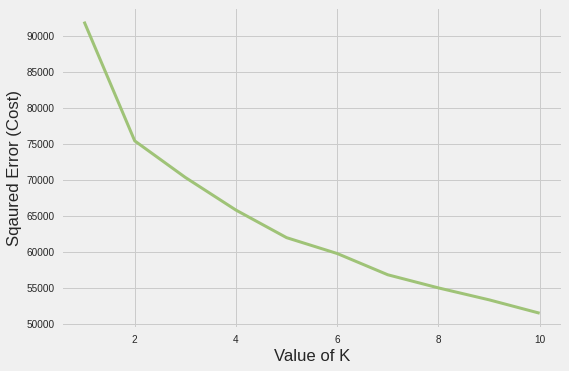

In [6]:
cost =[] 
for i in range(1, 11): 
    km = KMeans(n_clusters = i, max_iter = 500) 
    km.fit(df) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(km.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

### Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.17569027602160234
For n_clusters = 3 The average silhouette_score is : 0.1379401057750584
For n_clusters = 4 The average silhouette_score is : 0.11269525085599953
For n_clusters = 5 The average silhouette_score is : 0.134298819015952
For n_clusters = 6 The average silhouette_score is : 0.13133242041846263


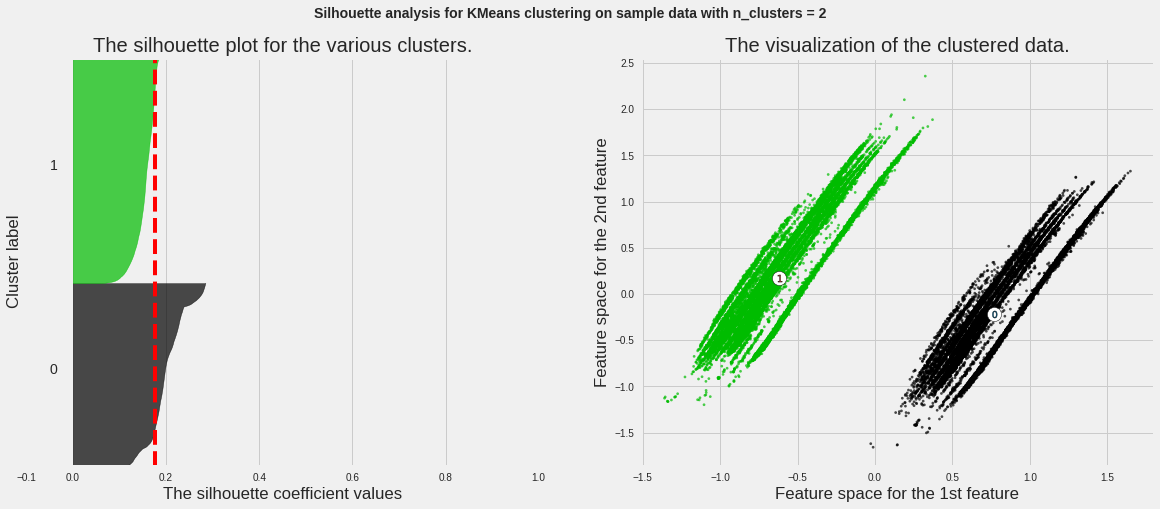

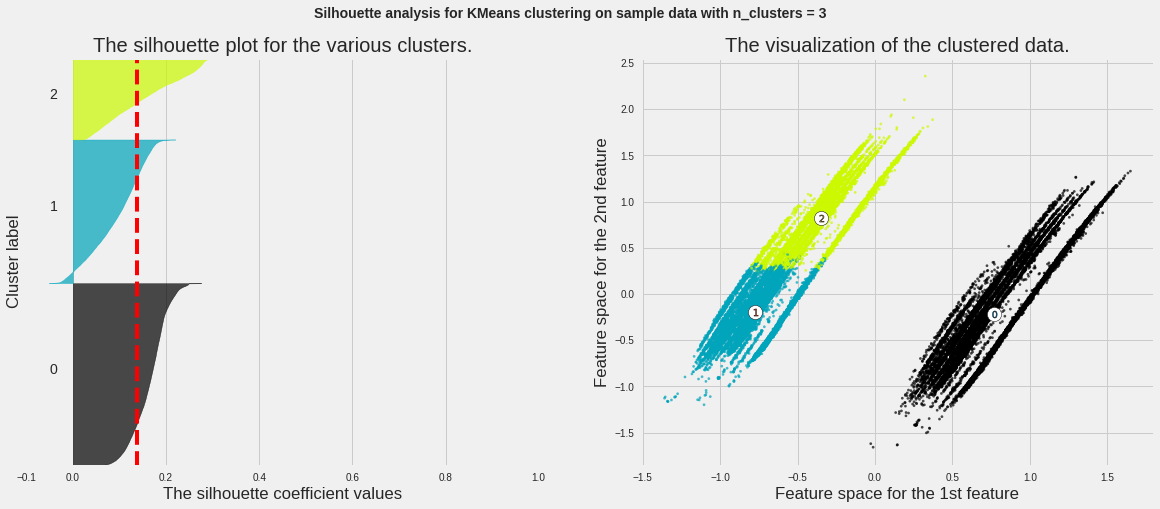

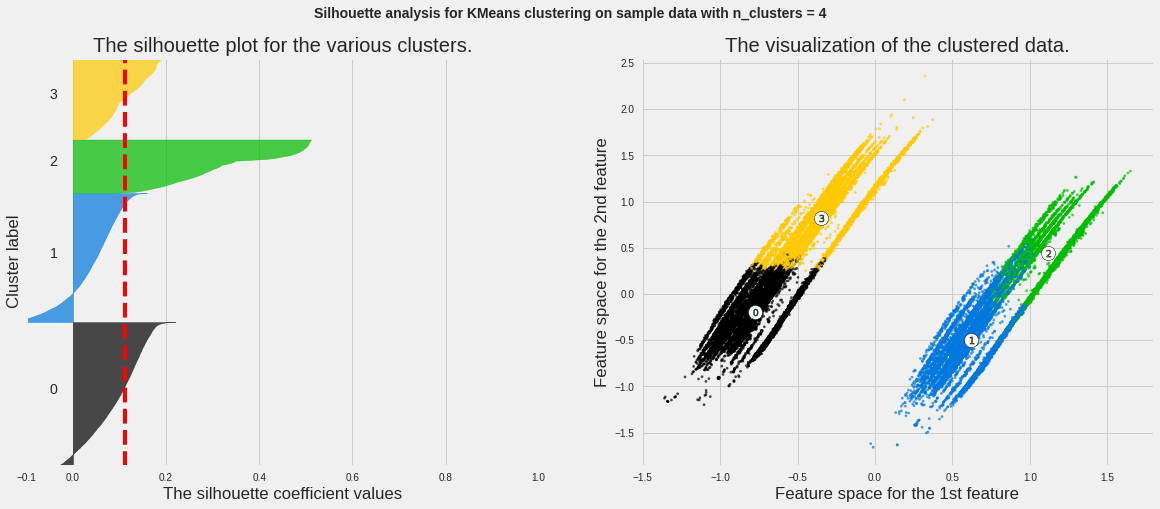

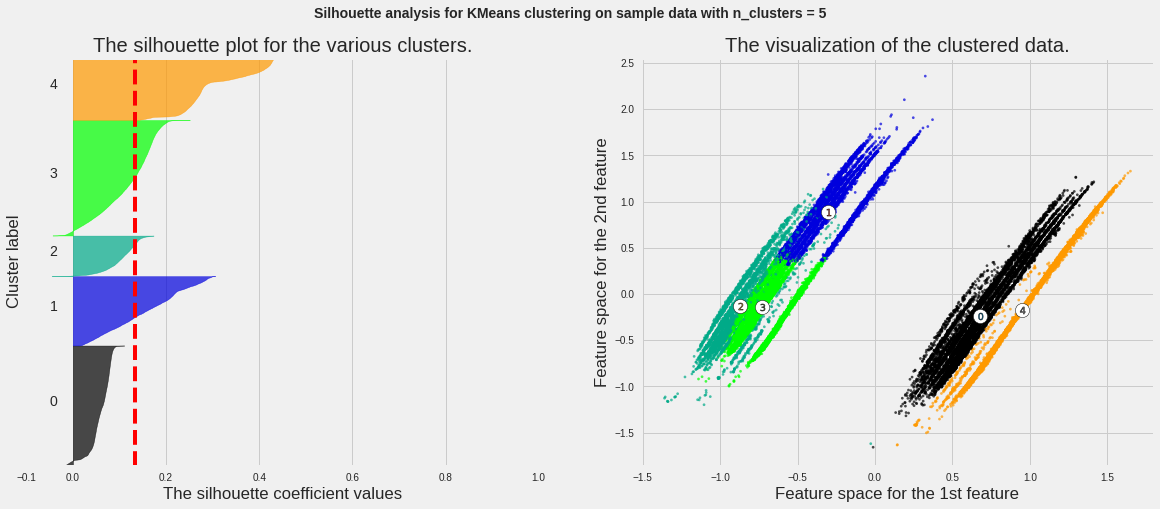

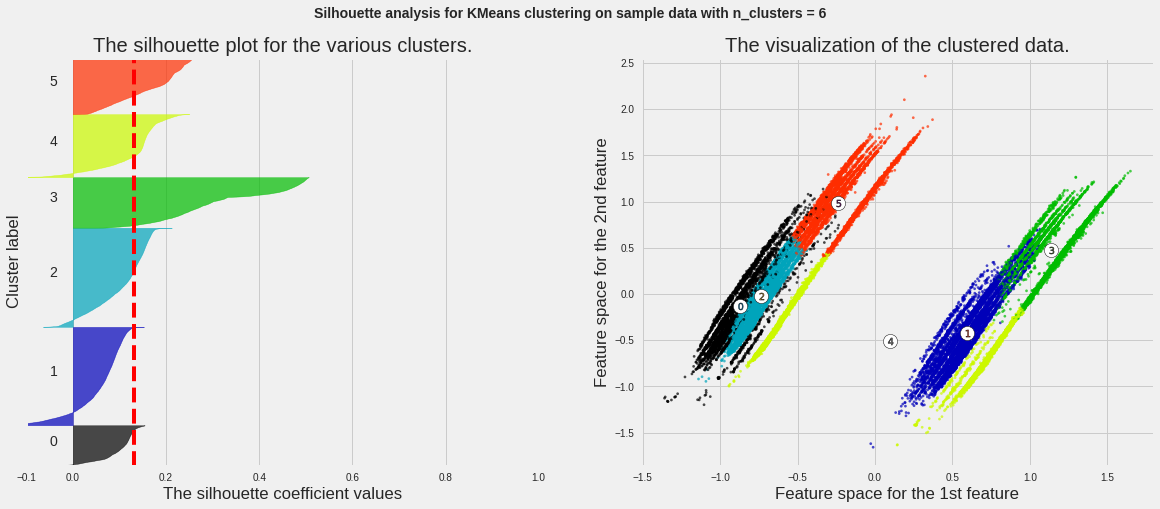

In [7]:

range_n_clusters = [2, 3, 4, 5, 6]

X = df.copy()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Clustering Labels

In [26]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(df)

cluster = pd.DataFrame(data=cluster_labels, columns=['cluster'])

cluster.to_csv('data_clusterLabel_2.csv', index=False)